## Import modules.

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path 

from mira.sources.vensim.__init__ import template_model_from_mdl_file
from mira.sources.amr.stockflow import main
from mira.metamodel.ops import stratify

## Define key to stratify on and stratum. We define three different age groups to stratify our models.

In [2]:
stratification_key = "age"
strata = ['young', 'middle', 'old']

## Load the SIR Vensim file, and create a MIRA template model from it and create a equivalent Stockflow template model.

In [3]:
SIR_PATH = Path.cwd() / "siparameterr.mdl"
SIR_URL = "https://raw.githubusercontent.com/SDXorg/test-models/master/samples/SIR/SIR.mdl"
vensim_tm_sir = template_model_from_mdl_file(SIR_PATH, url=SIR_URL)
sf_tm_sir = main()

## Compare equivalent parameters and values assigned to parameters for each template model.

Comparing parameters between the Vensim and StoByckflow, we see that both the Vensim and Stockflow model have six parameters each. Three parameters are iniitial conditions representing the value of each state at timestamp 0. The other 3 parameters are constants defined by the input model to be used in rate laws.

In [8]:
for param in vensim_tm_sir.parameters.values():
    print("vensim_param_name: {} | value: {}".format(param.name,param.value))
print()
for param in sf_tm_sir.parameters.values():
    print("stockflow_param_name: {} | value: {}".format(param.name,param.value))

vensim_param_name: contact_infectivity | value: 0.3
vensim_param_name: duration | value: 5.0
vensim_param_name: total_population | value: 1000.0
vensim_param_name: infectious0 | value: 5.0
vensim_param_name: recovered0 | value: 0.0
vensim_param_name: susceptible0 | value: 1000.0

stockflow_param_name: p_cbeta | value: 0.35
stockflow_param_name: p_N | value: 1001.0
stockflow_param_name: p_tr | value: 14.0
stockflow_param_name: S0 | value: 1000.0
stockflow_param_name: I0 | value: 1.0
stockflow_param_name: R0 | value: 0.0


## Compare equivalent rate laws between template models.

By mapping the contact_infectivity parameter to p_cbeta, total_population parameter to p_N, duration parameter to p_tr, and states [susceptible, infectious, recovered] to states [S,I,R] we can see that the rate laws between the two models are equivalent.

In [12]:
for template in vensim_tm_sir.templates:
    print("vensim_template_ratelaw: {}".format(template.rate_law))
print()
for template in sf_tm_sir.templates:
    print("stockflow_template_ratelaw: {}".format(template.rate_law))

vensim_template_ratelaw: contact_infectivity*infectious*susceptible/total_population
vensim_template_ratelaw: infectious/duration

stockflow_template_ratelaw: 1.0*I*S*p_cbeta/p_N
stockflow_template_ratelaw: 1.0*I/p_tr


## Visualize the Vensim template model. 

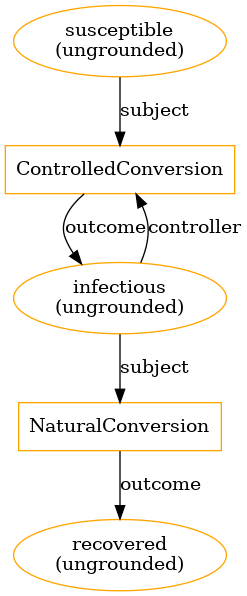

In [6]:
vensim_tm_sir.draw_jupyter()

## Stratify the loaded in Vensim Template Model by age and visualize it.

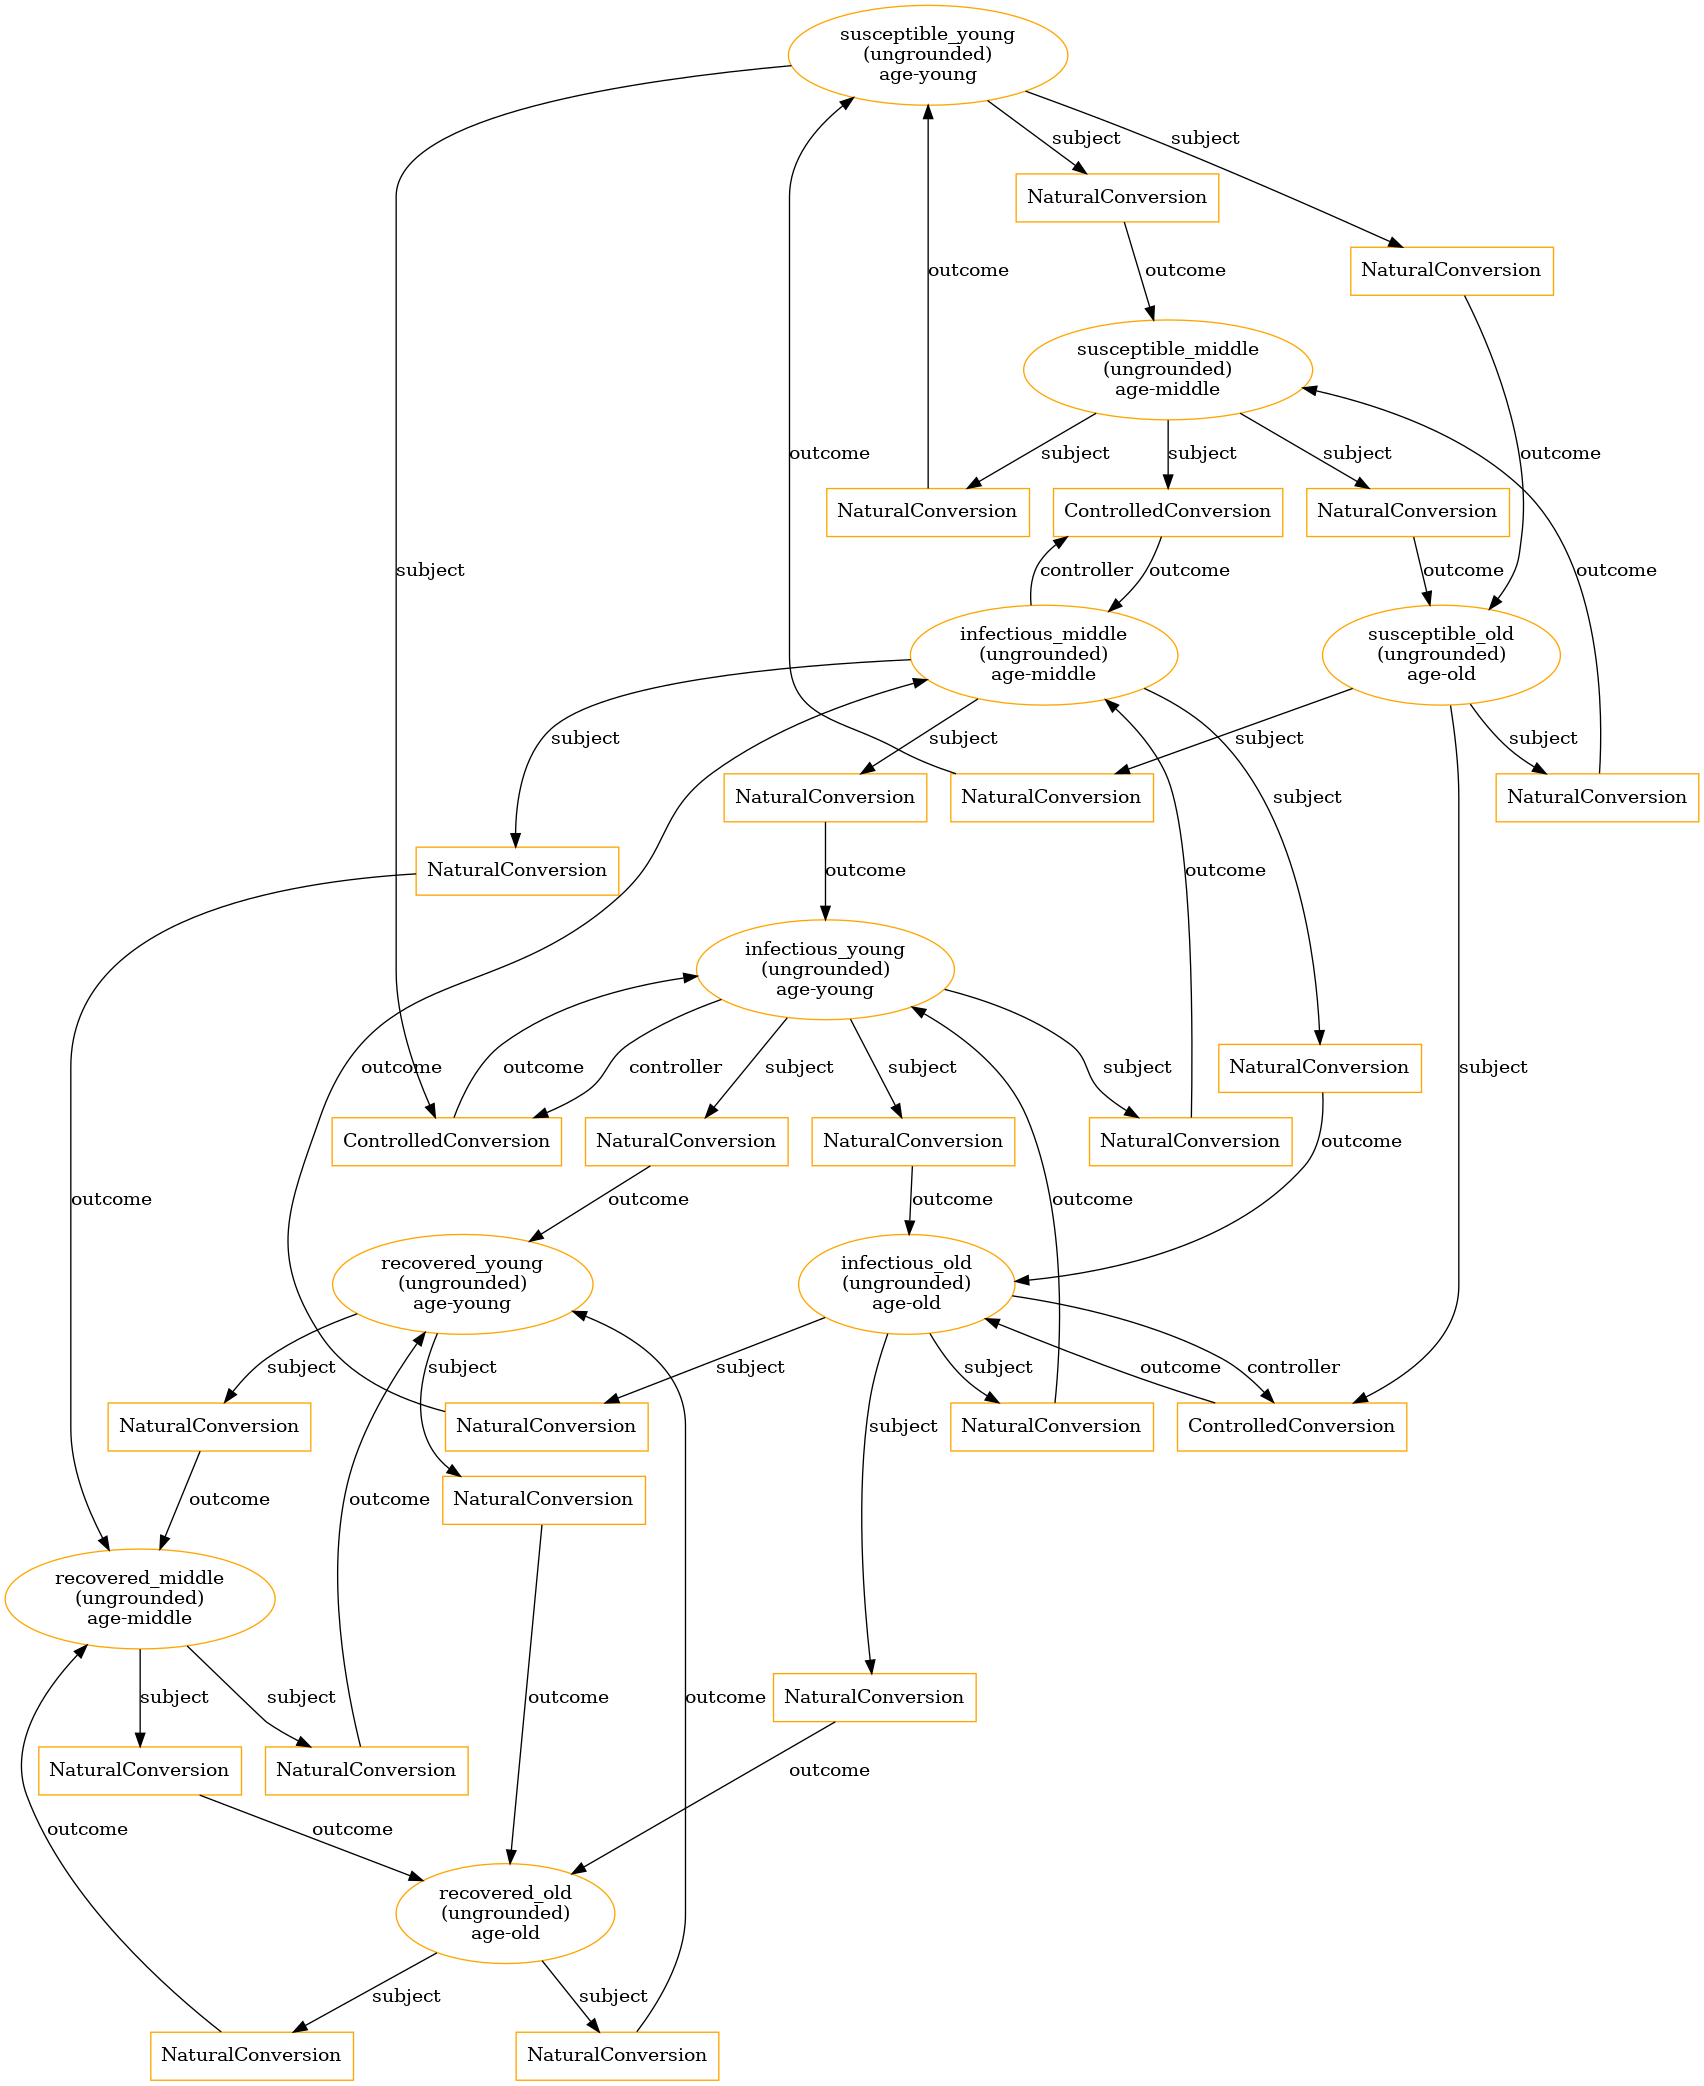

In [7]:
vensim_strat = stratify(vensim_tm_sir,key=stratification_key,strata=strata)
vensim_strat.draw_jupyter()